# Overview
### In this notebook, we aim to:

### (a) Perform Exploratory Data Analysis (EDA) on the online sales dataset.
### (b) Generate insights and recommendations based on the findings.




## 1. Import Libraries


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Data


In [7]:
data=pd.read_csv("Online Sales Data.csv")
# Display the first few rows of the dataset
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## 3. Data Preprocessing
### 3.1. Overview of Data

In [9]:
# Get a summary of the dataset
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
count,240.00000,240,240,240,240.000000,240.000000,240.000000,240,240
unique,NaN,240,6,232,NaN,NaN,NaN,3,3
top,NaN,2024-01-01,Electronics,Dyson Supersonic Hair Dryer,NaN,NaN,NaN,North America,Credit Card
freq,NaN,1,40,2,NaN,NaN,NaN,80,120
mean,10120.50000,NaN,NaN,NaN,2.158333,236.395583,335.699375,NaN,NaN
std,69.42622,NaN,NaN,NaN,1.322454,429.446695,485.804469,NaN,NaN
min,10001.00000,NaN,NaN,NaN,1.000000,6.500000,6.500000,NaN,NaN
25%,10060.75000,NaN,NaN,NaN,1.000000,29.500000,62.965000,NaN,NaN
50%,10120.50000,NaN,NaN,NaN,2.000000,89.990000,179.970000,NaN,NaN
75%,10180.25000,NaN,NaN,NaN,3.000000,249.990000,399.225000,NaN,NaN


### 3.2. Handle Missing Values


In [11]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


##### There are no null values

### 3.3. Check for Duplicates



In [13]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

In [15]:
duplicates.size


0

##### There are no duplicate rows

## 4. Data Analysis and Questions


### 4.1. Distribution of Total Revenue


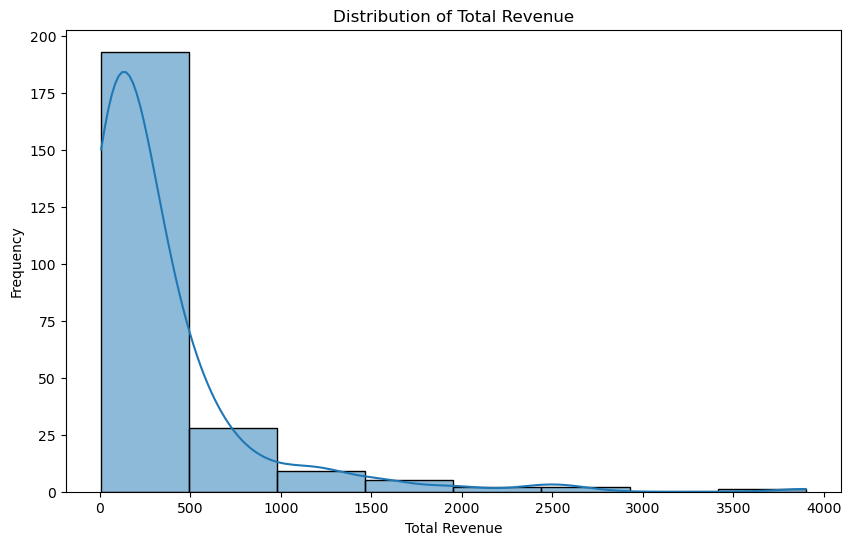

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data["Total Revenue"],bins=8,kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()           

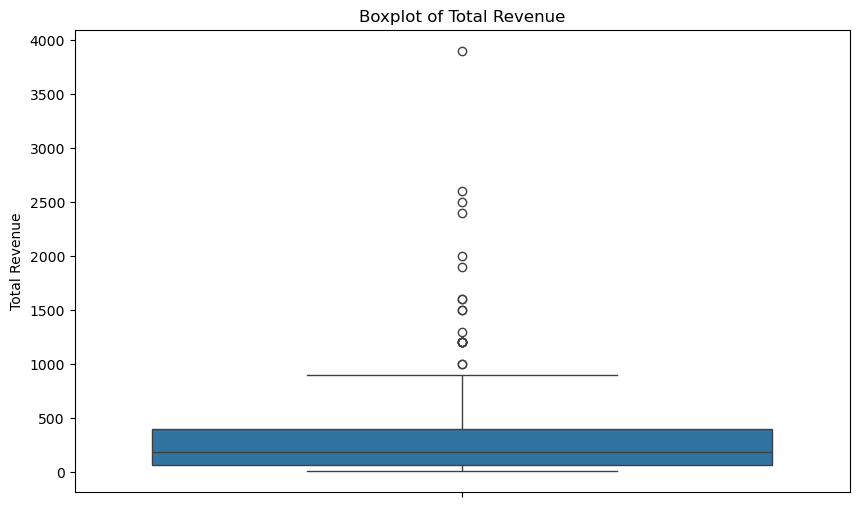

In [19]:

# Plotting the boxplot of Total Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(y='Total Revenue', data=data)
plt.title('Boxplot of Total Revenue')
plt.ylabel('Total Revenue')
plt.show()


#### Inisghts : The total revenue seem to be Right Skewed (Positive Skewed) as The median is closer to the bottom of the box (near Q1), and the whisker on the top side (above the median) is longer than the one on the bottom. 

#### Most of the total revenue lies between 0 and 500, and Q3 or the 75 percentile also lies below 500, it means that 75% of the individual data points (Total revenue values for each transaction_id ) are below that $500 value





In [634]:
data.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### 1 What is the total revenue generated from all transactions?


In [636]:
data["Total Revenue"].sum()

80567.84999999999

### 2How many transactions were recorded in each product category?



In [638]:
no=data.groupby("Product Category")["Transaction ID"].count()
no

Product Category
Beauty Products    40
Books              40
Clothing           40
Electronics        40
Home Appliances    40
Sports             40
Name: Transaction ID, dtype: int64

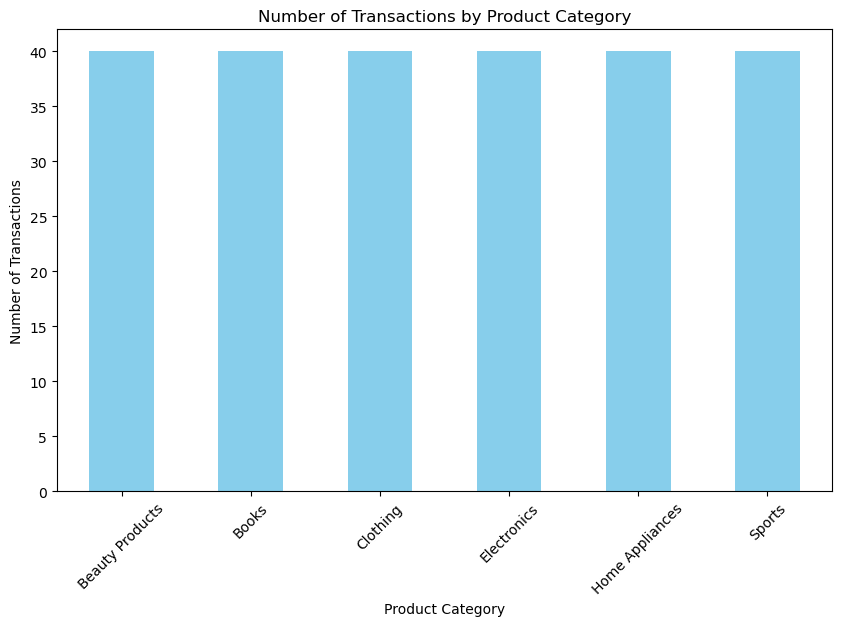

In [51]:
ax = no.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions by Product Category')
plt.xticks(rotation=45)
plt.show()

#### Insights: each product in the products category have   the same amount of transacations i.e 40

### 3) Bar chart of Total revenue by each Product category


In [640]:
tot_rev=data.groupby("Product Category")["Total Revenue"].sum()
tot_rev

Product Category
Beauty Products     2621.90
Books               1861.93
Clothing            8128.93
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Name: Total Revenue, dtype: float64

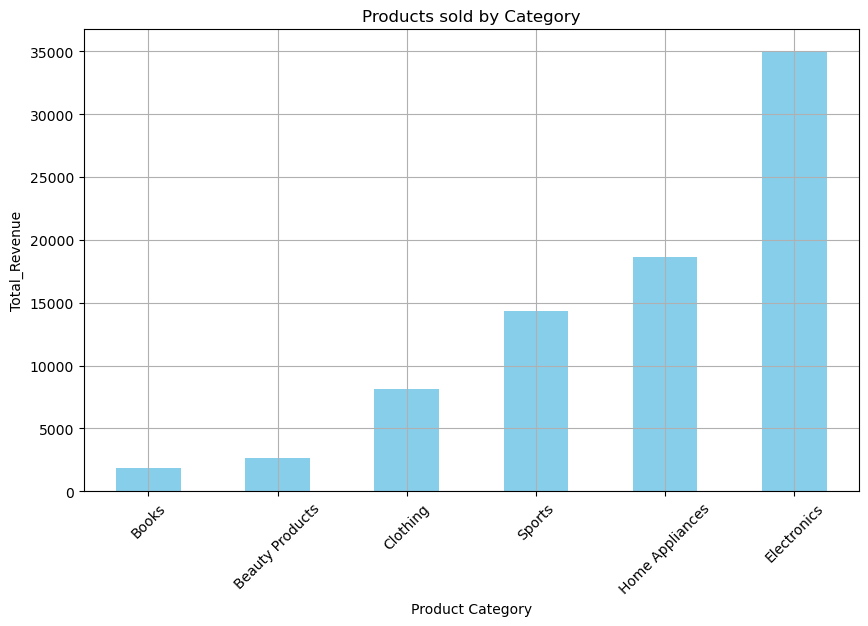

In [261]:
tot_rev.sort_values().plot(kind='bar',color='skyblue',figsize=(10,6))
plt.title("Products sold by Category")
plt.xlabel("Product Category")
plt.ylabel("Total_Revenue")
plt.grid(True)  
plt.xticks(rotation=45)
plt.show()

#### Insights: Electronics product category has got the highest total revenue of 35000


### 4) Analyzing the Monthly Revenue Trends for the Top-Grossing Electronics Category

Text(0.5, 1.0, 'Monthly Revenue of Electronic products category')

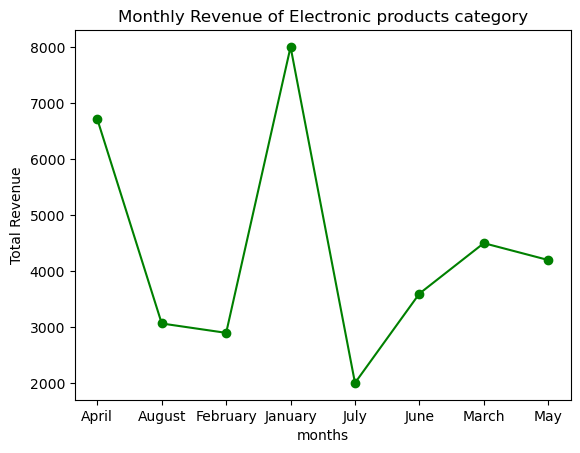

In [21]:
data["Date"]=data["Date"].astype("datetime64[ns]")
data["Month_name"]=data["Date"].dt.month_name()
data["Month"]=data["Date"].dt.month

electronics_data=data[data["Product Category"]=="Electronics"]
g1=electronics_data.groupby("Month_name")["Total Revenue"].sum()

g2=g1.reset_index()
plt.plot(g2["Month_name"],g2["Total Revenue"],marker='o',color='g')
plt.xlabel("months")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue of Electronic products category")

Text(0.5, 1.0, 'Monthly Revenue of Electronic products category')

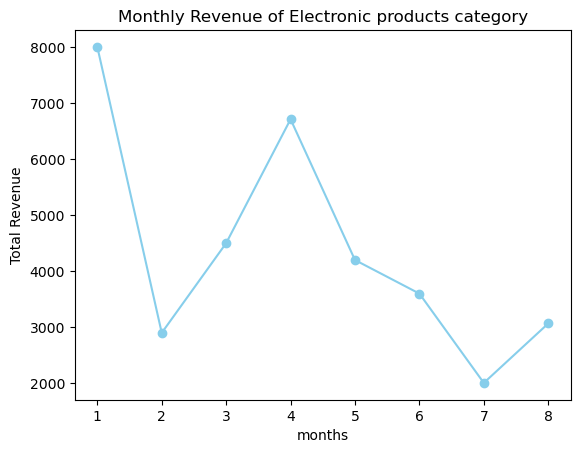

In [33]:
g1=electronics_data.groupby("Month")["Total Revenue"].sum().sort_index().plot(marker='o',color='skyblue')
plt.xlabel("months")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue of Electronic products category")


#### January records the highest sales for electronics. Following this, sales decrease until April, when they peak again.
#### After April, sales decline steadily through the remaining months, with July experiencing the lowest sales

 ### 5) Identifying the Product with the Highest Sales Volume





In [25]:
sales=data.groupby("Product Name")["Units Sold"].sum().sort_values(ascending=False)

res=sales.reset_index()        #converting a series object into dataframe
res["Product Name"].nunique()  #232  unique values in column Product Name
res.info()                     #total 232 non-null rows in Product name column, which means all the values within the colum are unique



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  232 non-null    object
 1   Units Sold    232 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


Text(0.5, 1.0, 'Top ten products with highest units sold')

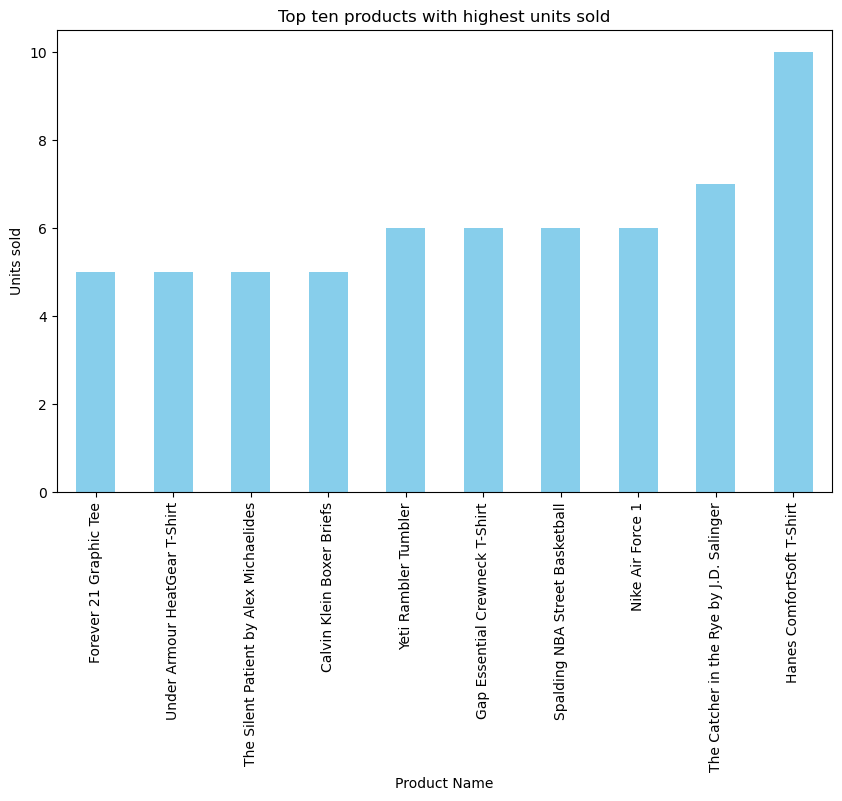

In [35]:
sales.head(10).sort_values().plot(kind='bar',color='skyblue',figsize=(10,6))
plt.xticks(rotation=90);
plt.xlabel("Product Name")
plt.ylabel("Units sold")
plt.title("Top ten products with highest units sold")

#### Insights:  Hanes ComfortSoft T-Shirt  has the highest units saled , with 10 units being sold totally

<Axes: xlabel='Month_name'>

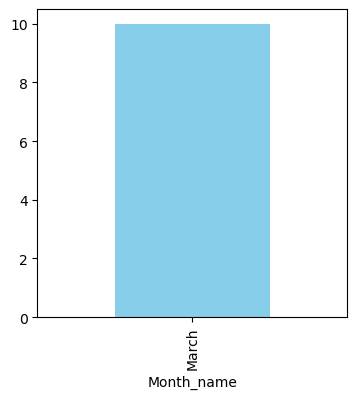

In [27]:
filtered_data=data[data["Product Name"]=="Hanes ComfortSoft T-Shirt"]
f=filtered_data.groupby("Month_name")["Units Sold"].sum()
f.plot(kind='bar',color='skyblue',figsize=(4,4))

#### Insights: The Hanes ComfortSoft T-Shirt, the top-selling product, was only sold in March with a total of 10 units. There were no sales for this product in any other month

### (6) Identifying the Product name that generated the highest total revenue  

Text(0.5, 1.0, 'Top ten products with highest revenue')

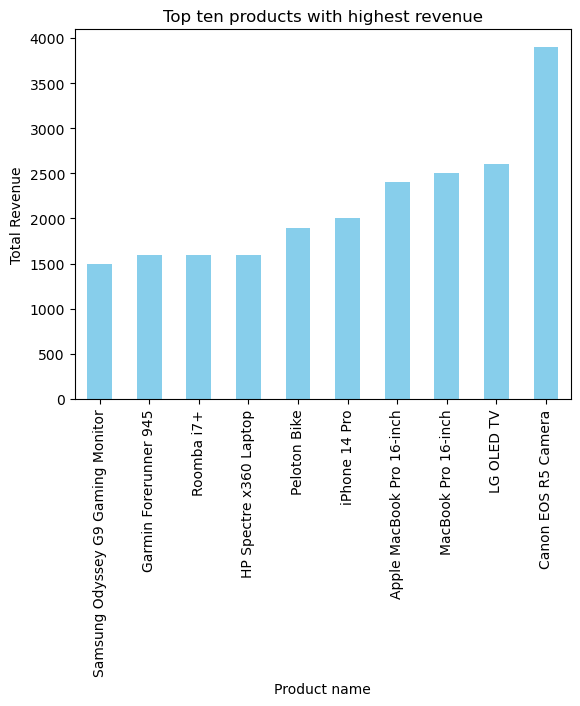

In [37]:
tot_reve=data.groupby("Product Name")['Total Revenue'].sum().sort_values(ascending=False)
tot_reve.head(10).sort_values().plot(kind='bar',color='skyblue')
plt.xlabel("Product name")
plt.ylabel("Total Revenue")
plt.title("Top ten products with highest revenue")

#### Insights: "Canon EOS R5 Camera" is the product that generated the highest revenue

Text(0.5, 1.0, "Monthly variation  of sales of 'Canon EOS R5 Camera")

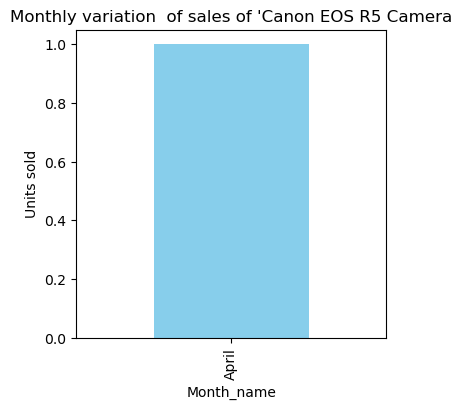

In [39]:
filter_data2=data[data["Product Name"]=='Canon EOS R5 Camera']
g3=filter_data2.groupby("Month_name")["Units Sold"].sum()
g3.plot(kind='bar',color='skyblue',figsize=(4,4))

plt.ylabel("Units sold")
plt.title("Monthly variation  of sales of 'Canon EOS R5 Camera")

#### Insights: Canon EOS R5 Camera, the top-revenue generated product, was only sold in April with a total of 1 units. There were no sales for this product in any other month¶

In [47]:
k=tot_reve.head(10).index.to_series()
# tot_reve is a series object that has groupby of total rvenue aggregated by sum sorted descending
#the top ten is selected,as the index has its name, we used .index , and then converted to series object using to_series()

filter_df= data[data['Product Name'].isin(k)]


pivot_table = pd.pivot_table(filter_df, 
                             values='Total Revenue', 
                             index='Month_name', 
                             columns='Product Name', 
                             aggfunc='sum', 
                             fill_value=0)




In [49]:
df3=pivot_table.reset_index()


In [51]:
df4=df3.melt(id_vars='Month_name',var_name='Product',value_name='Total Revenue')


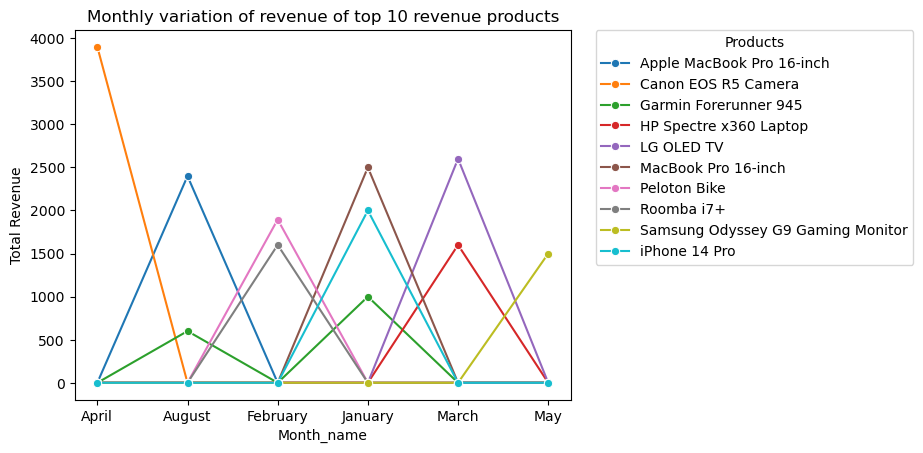

<Figure size 1000x1700 with 0 Axes>

In [65]:
ax=sns.lineplot(data=df4,x='Month_name', y='Total Revenue', hue='Product', marker='o')
plt.title("Monthly variation of revenue of top 10 revenue products")
plt.figure(figsize=(10, 17))
ax.legend(title='Products', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

#### Insights: Each product experiences its peak revenue in a specific month, with January having the highest number of peak revenue periods.

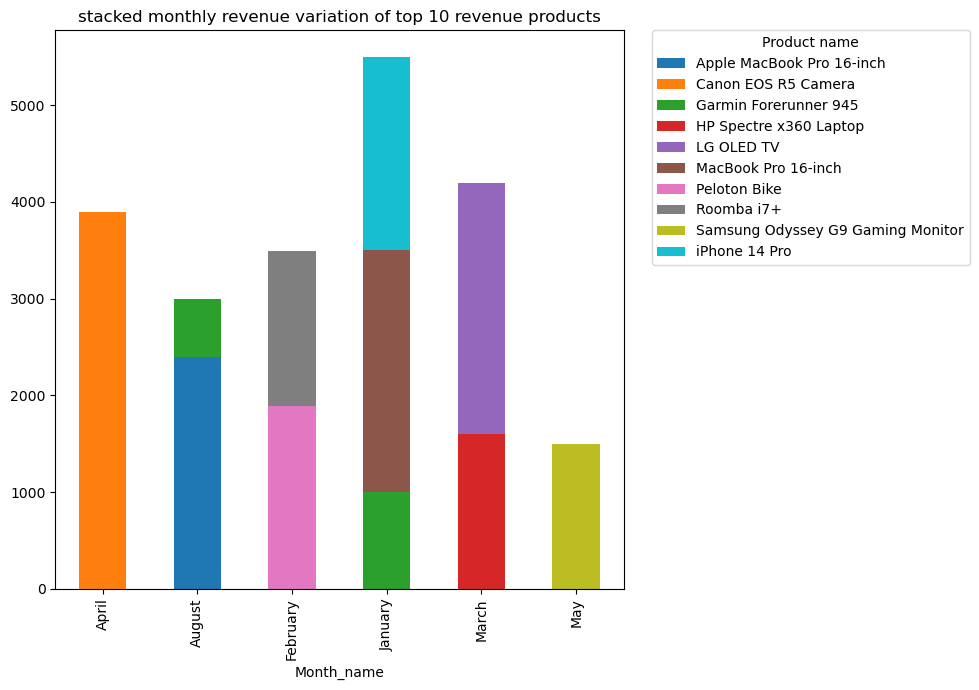

In [73]:
df4=df3.set_index('Month_name')

sd=df4.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title("stacked monthly revenue variation of top 10 revenue products")
sd.legend(title='Product name', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()

#### Insight: January generated the highest revenue from the top ten highest-grossing products.



 

### (7) The pie chart of sales distribution by region
###  Sales distribution by region refers to how the total revenue is divided among different regions. 

<Axes: ylabel='Total Revenue'>

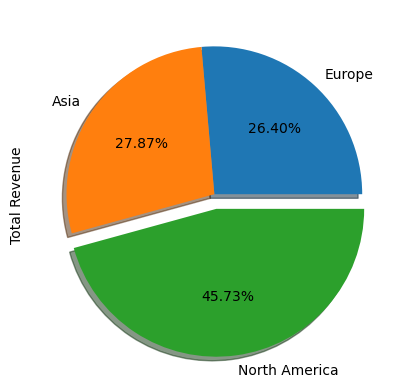

In [106]:
pie=data.groupby("Region")["Total Revenue"].sum().sort_values()
pie.plot(kind='pie',shadow=True,explode=[0,0,0.1],autopct="%1.2f%%")	

#### Insights: This shows that North America has the highest revenues generated 

## Trends in chart showing monthly revenue over time


<Axes: xlabel='Month_name', ylabel='Total Revenue'>

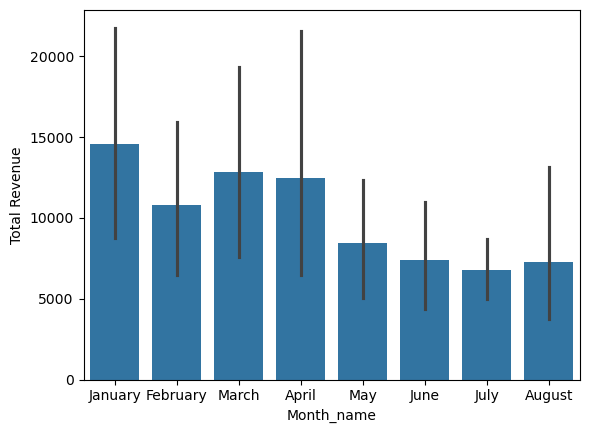

In [95]:
import numpy as np
sns.barplot(x= 'Month_name',y='Total Revenue', data=data, estimator='sum')

### Insights: January records the highest revenue across all product sales

<Axes: xlabel='Month_name', ylabel='Total Revenue'>

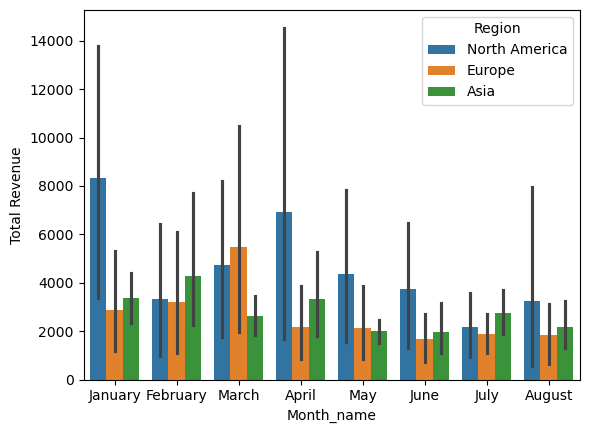

In [103]:
sns.barplot(x= 'Month_name',y='Total Revenue', data=data, estimator='sum',hue="Region")

### Europe achieves the highest sales in March, while Asia leads in sales during February and July. In other months, North America holds the top sales position.

<Axes: xlabel='Month_name', ylabel='Total Revenue'>

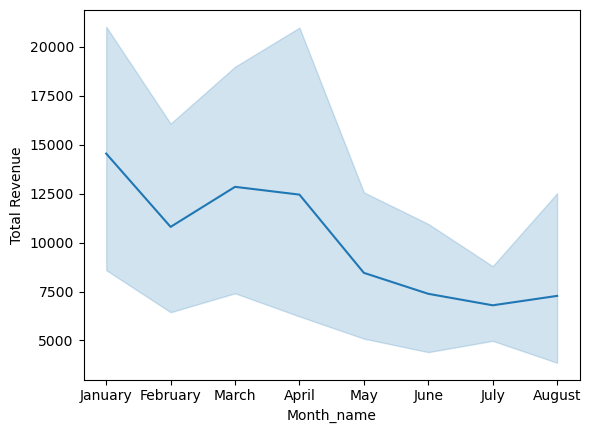

In [112]:
sns.lineplot(x= 'Month_name',y='Total Revenue', data=data, estimator='sum')

#### Insights This line chart illustrates the fluctuation in total revenue across different months, revealing a decline in revenue as the year progresses toward its end.

In [123]:
pmeth=data.groupby("Payment Method")["Transaction ID"].count()

<Axes: ylabel='Transaction ID'>

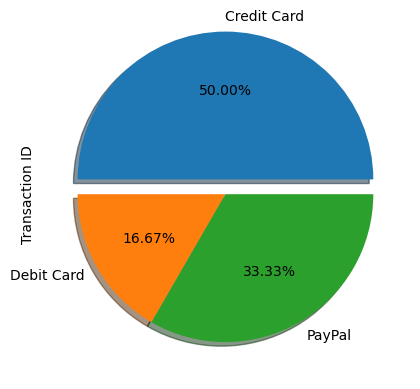

In [141]:
#pie=data.groupby("Region")["Total Revenue"].sum().sort_values()
pmeth.plot(kind='pie',shadow=True,explode=[0.1,0,0],autopct="%1.2f%%")

#### Insights:  This shows 50 percent people use credit card for payments

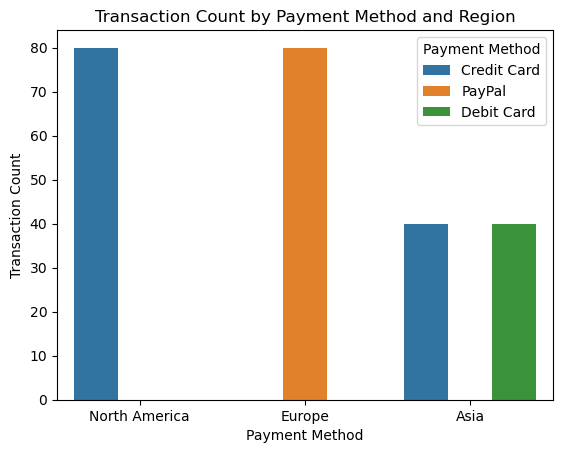

In [151]:
#sns.barplot(x= 'Payment Method',y='Transaction ID', data=data, estimator='count',hue="Region")
sns.countplot(x='Region', data=data, hue='Payment Method')
plt.title('Transaction Count by Payment Method and Region')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')
plt.show()

#### Insights : In North America, all transactions were made exclusively with credit cards. In Europe, PayPal was the sole payment method used. In Asia, both credit cards and debit cards were used equally for transactions, while PayPal was not utilized at all